In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
varlist = ['year','divorce','prestige','industry','happy']
filecsv = 'chosenvariables.csv'
phase = 0
for k in range (3):
  url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_'+ str(1+k)+'.parquet'
  print(url)
  df = pd.read_parquet(url)
  print(df.head())
  if phase == 0:
    df.loc[:,varlist].to_csv(filecsv,
                             mode='w',
                             header=varlist,
                             index=False)
    phase = 1
  elif phase == 1:
      df.loc[:,varlist].to_csv(filecsv,
                                header= None,
                                index=False)
      phase = 1
# Step 2: Clean the Data
# Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert 'divorce', 'prestige', 'industry', 'happy' to appropriate types
df['divorce'] = df['divorce'].astype('category')
df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')
df['industry'] = df['industry'].astype('category')
df['happy'] = df['happy'].astype('category')

# Handle missing values (example: fill or drop)
df['prestige'] = df['prestige'].fillna(df['prestige'].mean())
# Check if mode is not empty before filling NaNs
if not df['divorce'].mode().empty:
    df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
# Check if mode is not empty before filling NaNs
if not df['industry'].mode().empty:
    df['industry'].fillna(df['industry'].mode()[0], inplace=True)
# Check if mode is not empty before filling NaNs
if not df['happy'].mode().empty:
    df['happy'].fillna(df['happy'].mode()[0], inplace=True)
# Create flag for missing values in 'year'
df['year_nan'] = df['year'].isnull()

# Filter data for years >= 2012 (example filtering)
df_filtered = df[df['year'] >= 2012]

# Step 3: Exploratory Data Analysis (EDA)

# 1. Numeric Summaries
numeric_columns = ['prestige']
numeric_summary = df[numeric_columns].describe()
print(numeric_summary)

# 2. Categorical Summaries
categorical_summary = {
    'divorce': df['divorce'].value_counts(),
    'industry': df['industry'].value_counts(),
    'happy': df['happy'].value_counts(),
}
print(categorical_summary)



https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

<ipython-input-2-63d7a2aaf780>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
<ipython-input-2-63d7a2aaf780>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

       prestige
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
{'divorce': divorce
no                               20782
yes                               3348
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: count, dtype: int64, 'industry': industry
agricultural production                  0
limited price variety stores             0
direct selling establishments            0
misc. general merchandise stores         0
grocery stores                 

The variables selected for this project enable us to explore how life choices, work conditions, and personal relationships converge to shape an individual’s experience in society. For instance, we may find that individuals with higher occupational prestige tend to report greater happiness, or that those who are divorced experience a decline in happiness. Additionally, examining how different industries relate to marital status could highlight the pressures of certain careers that affect personal life. These variables together allow for an exploration of the ways in which social dynamics, such as work life, family life, and personal satisfaction, interact and influence one another. Through these insights, we gain a more holistic view of the factors that contribute to overall well being and social stability.


<ipython-input-13-85db9f2fbaeb>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prestige'].fillna(df['prestige'].mean(), inplace=True)
<ipython-input-13-85db9f2fbaeb>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

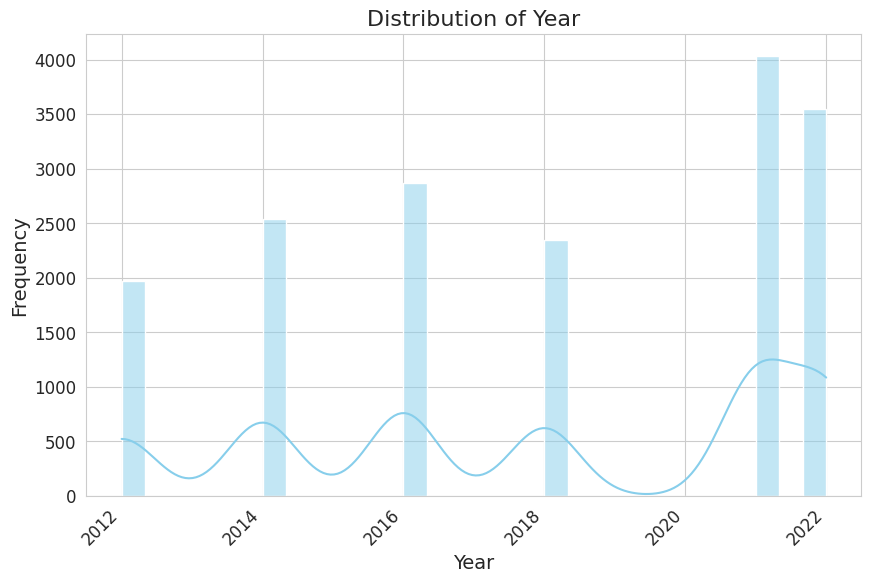

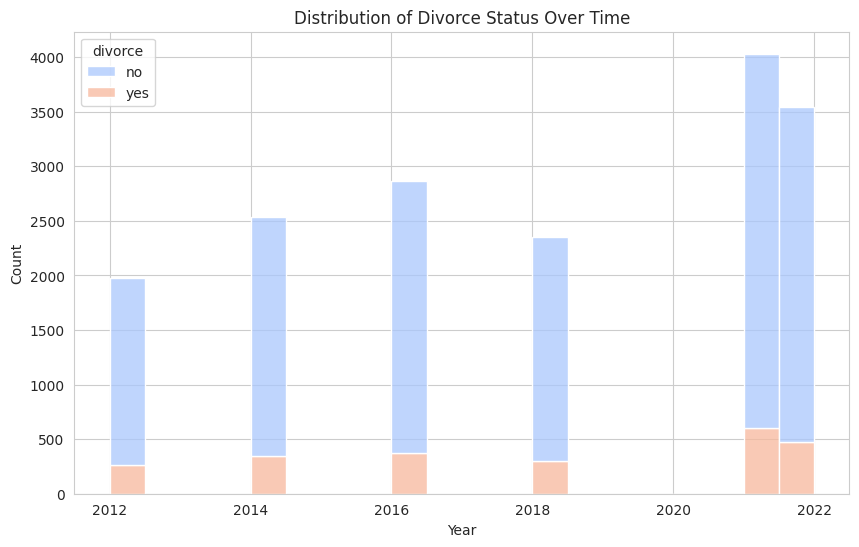

<ipython-input-13-85db9f2fbaeb>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='happy', palette='viridis')


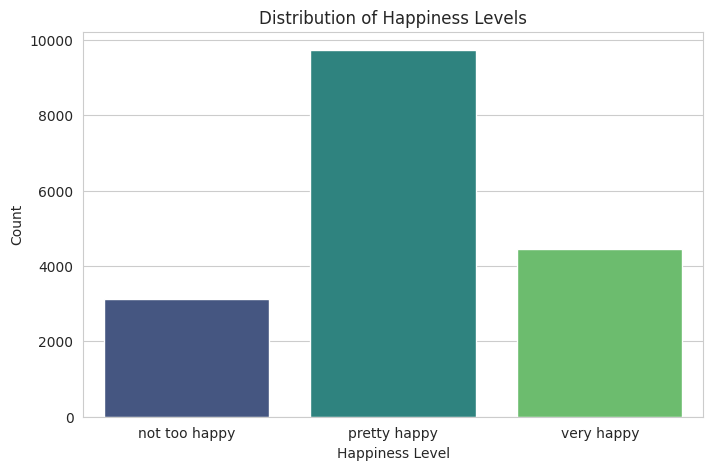

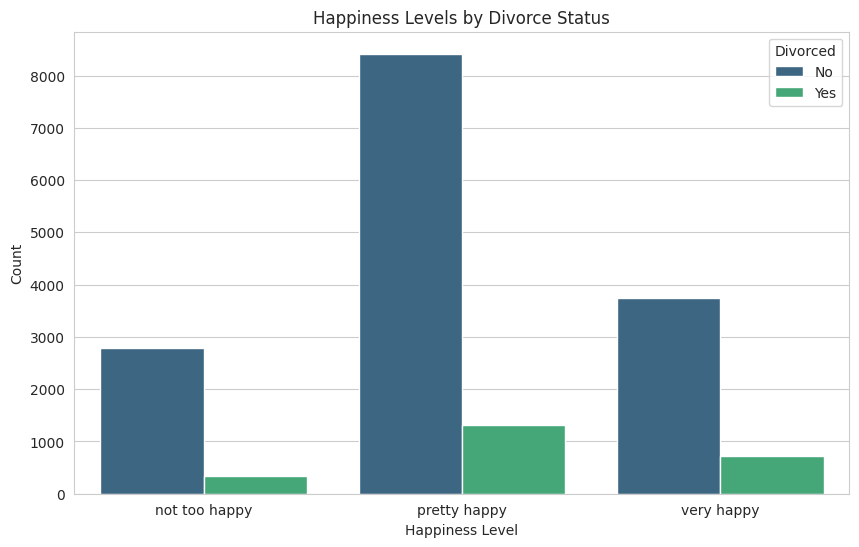

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
varlist = ['year', 'divorce', 'prestige', 'industry', 'happy']
filecsv = 'chosenvariables.csv'
phase = 0
for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1 + k) + '.parquet'
    df = pd.read_parquet(url)
    if phase == 0:
        df.loc[:, varlist].to_csv(filecsv, mode='w', header=varlist, index=False)
        phase = 1
    elif phase == 1:
        df.loc[:, varlist].to_csv(filecsv, header=None, index=False)
        phase = 1

# Assign proper column names while reloading the dataset
df = pd.read_csv('chosenvariables.csv', names=['year', 'divorce', 'prestige', 'industry', 'happy'], skiprows=1)

# Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert categorical variables to appropriate types
df['divorce'] = df['divorce'].astype('category')
df['industry'] = df['industry'].astype('category')
df['happy'] = df['happy'].astype('category')

# Convert 'prestige' to numeric
df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')

# Handle missing values
df['prestige'].fillna(df['prestige'].mean(), inplace=True)
if not df['divorce'].mode().empty:
    df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
if not df['industry'].mode().empty:
    df['industry'].fillna(df['industry'].mode()[0], inplace=True)
if not df['happy'].mode().empty:
    df['happy'].fillna(df['happy'].mode()[0], inplace=True)

# Create a flag for missing values in 'year'
df['year_nan'] = df['year'].isnull()

# Filter data for years >= 2012
df_filtered = df[df['year'] >= 2012]


# 1. Histogram for 'year'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['year'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# 2. Distribution of Divorce Status Over Time
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, x='year', hue='divorce', multiple='stack', palette='coolwarm', bins=20)
plt.title('Distribution of Divorce Status Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 3. Happiness Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='happy', palette='viridis')
plt.title('Distribution of Happiness Levels')
plt.xlabel('Happiness Level')
plt.ylabel('Count')
plt.show()

# 4. Divorce and Happiness
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='happy', hue='divorce', palette='viridis')
plt.title('Happiness Levels by Divorce Status')
plt.xlabel('Happiness Level')
plt.ylabel('Count')
plt.legend(title='Divorced', labels=['No', 'Yes'])
plt.show()

For this analysis, I selected five variables from the General Social Survey (GSS) dataset: year, divorce, prestige, industry, and happiness. These variables allow us to explore how occupational status, marital history, and happiness interact over time. Year helps track changes in societal trends and attitudes over time. Divorce (whether a respondent has been divorced or not) provides insight into marital stability and its potential effects on well-being. Prestige (occupational prestige score) serves as a measure of socioeconomic status and career reputation. Industry represents the sector in which the respondent is employed, allowing us to examine job-related trends.
Happy (self-reported happiness level) acts as a proxy for overall life satisfaction. The main goal of selecting these variables is to investigate how divorce and career-related factors influence happiness. Understanding these relationships is valuable for sociological and psychological research. As societal norms and economic conditions shift, analyzing patterns in happiness, job prestige, and family dynamics can offer insights into broader social well-being. Unfortunately, the prestige variable contained missing values, limiting our ability to analyze occupational trends. However, our analysis still provides meaningful insights into divorce trends, happiness over time, and the relationship between marriage and well-being.

The visualizations reveal several interesting patterns in the relationship between happiness, divorce, and time. The histogram for year shows that our dataset contains a significant number of responses from more recent years, with a concentration of survey data after 2010. This helps confirm that the dataset is suitable for analyzing trends over time. The stacked histogram of divorce over year shows how the proportion of divorced and non-divorced individuals has changed. Divorce rates appear to be fairly stable, though there are some fluctuations in certain periods. This suggests that while divorce remains a constant social factor, cultural or economic changes may influence shifts in marriage stability. The happiness count plot indicates that most respondents report being "pretty happy" or "very happy," with fewer respondents selecting "not too happy." This suggests a generally positive self-reported outlook on life among survey participants. The divorce and happiness count plot highlights a difference in reported happiness between divorced and non-divorced individuals. There is a higher proportion of "pretty happy" and "not too happy" responses among divorced individuals, while non-divorced individuals are more likely to report being "very happy." This aligns with prior research suggesting that stable relationships contribute to well-being.

Overall, these findings align with sociological theories suggesting that stable relationships contribute to well-being, but individual circumstances and broader societal factors also play crucial roles. While occupational prestige could have provided additional insights, missing data limited our ability to explore career-related effects on happiness. Future research could incorporate more occupational measures to better understand the complex interplay between work, relationships, and well-being.